## Intro to Deep Learning with PyTorch
### The XOR Problem

Updated 08/21/2024 G. Chism, U of A InfoSci + DataLab

## Install required libraries

For this case we will import _PyTorch_, _sklearn_, _pandas_, and _numpy_.

**To execute code Notebook cells:** Press _SHIFT+ENTER_

In [8]:
#!pip install -q torch
#!pip install -q scikit-learn
#!pip install -q pandas
#!pip install -q numpy
#!pip install -q matplotlib

It's best practice to have all of the libraries loaded at the top of the page

In [9]:
# Import specific classes from PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Import preprocessing from Scikit-Learn
from sklearn.preprocessing import StandardScaler

# Import pandas and numpy
import pandas as pd
import numpy as np

# Import matplotlib
import matplotlib.pyplot as plt

## Loading the XOR dataset

- The XOR (Exclusive OR) gate is a logic gate that outputs true (1) only when the inputs differ (one is true, the other is false).

- XOR is a classic problem in neural networks because it highlights the limitations of simple linear models.

In [10]:
xor = pd.read_csv("data/xor.csv")

Note that its best practice to convert the target variables to _numpy_ arrays before implementing machine or deep learning tasks. This is because of the following:

1. Compatibility: Works seamlessly with ML/DL libraries like PyTorch and TensorFlow.

2. Efficiency: Faster processing and lower memory usage.

3. Consistency: Ensures uniform data types and shapes, reducing errors.

4. Batch Operations: Supports efficient batch processing, crucial for training models.

5. Interoperability: Easily converts to other structures like tensors, enhancing workflow flexibility.

In [11]:
X = xor[['x1', 'x2']].values
y = xor['class label'].values

### Visualize the dataset

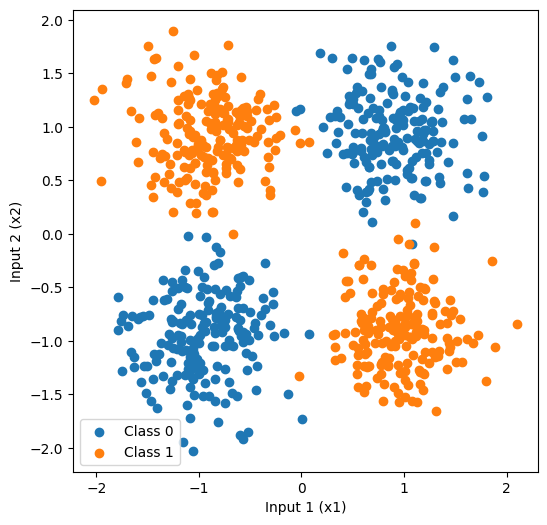

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1')
plt.xlabel('Input 1 (x1)')
plt.ylabel('Input 2 (x2)')
plt.legend()
plt.show()

## Data preparation

- Normalize the data to ensure features are on a similar scale.

- Convert the data into PyTorch tensors for model training.

- Use DataLoader* to handle batching, which improves training efficiency and stability.

*DataLoaders in PyTorch are tools that efficiently load and manage datasets. They handle batching, shuffling, and parallel processing, making it easier to feed data into models during training and evaluation.

In [13]:
# Load and normalize data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_normalized, dtype=torch.float32)
y_tensor = torch.tensor(y.reshape(-1, 1), dtype=torch.float32)

# Create DataLoader for batching
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

## Building the XOR Neural Network

**Defining the Neural Network Architecture:**

- A simple network with one hidden layer, using sigmoid activation functions.

- The first layer maps the 2 input features to 2 hidden neurons.

- The second layer outputs a single value, predicting the class.

In [14]:
import torch.nn as nn

class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 1)
    
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

model = XORNet()

## Training the Network

**Implementing the Training Loop:**

- Perform a forward pass, compute the loss, and backpropagate the error.

- Update weights and biases using the optimizer.

- Monitor loss to ensure the model is learning correctly.

Note that we are using 1,000 Epochs (passes through the data), but its good practice to use something more like 10,000 Epochs.

In [15]:
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training the network
for epoch in range(1000):
    for batch_X, batch_y in dataloader:
        optimizer.zero_grad()
        output = model(batch_X)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')


Epoch 100, Loss: 0.4007839560508728
Epoch 200, Loss: 0.008844048716127872
Epoch 300, Loss: 0.0015664100646972656
Epoch 400, Loss: 0.20895591378211975
Epoch 500, Loss: 0.001238553668372333
Epoch 600, Loss: 0.0001459359918953851
Epoch 700, Loss: 0.0914442390203476
Epoch 800, Loss: 0.0007877428433857858
Epoch 900, Loss: 2.7929330826736987e-05
Epoch 1000, Loss: 0.00019432838598731905


## Testing and Evaluation

**Testing the Model on XOR Dataset:**

- Evaluate the model on the entire dataset after training.

- Calculate accuracy by comparing predicted values to actual labels.

In [16]:
# Testing and evaluation
with torch.no_grad():
    predicted = model(X_tensor)
    predicted = (predicted > 0.5).float()
    accuracy = (predicted == y_tensor).sum().item() / y_tensor.size(0)
    print(f'Accuracy: {accuracy * 100}%')

Accuracy: 97.2%
